In [68]:
import os

parent_dir = '/home/varun/Desktop/Malaria_Dataset'
data_dir='/home/varun/Desktop/Malaria_Dataset/Malaria_Training_dataset'

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [70]:
os.listdir(data_dir)

['Uninfected', 'Parasitized']

In [71]:
print(os.listdir(data_dir+'/Parasitized')[1000])

C52P13thinF_IMG_20150725_125847_cell_171.png


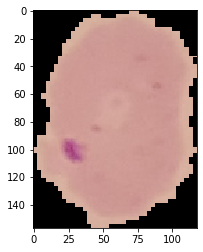

In [72]:
#Parasitized Cell random Image selection
para_cell= data_dir+'/Parasitized/'+'C52P13thinF_IMG_20150725_125847_cell_171.png'
para_cell=imread(para_cell)
plt.imshow(para_cell)

In [73]:
print(os.listdir(data_dir+'/Uninfected')[2000])

C85P46ThinF_IMG_20150820_110143_cell_154.png


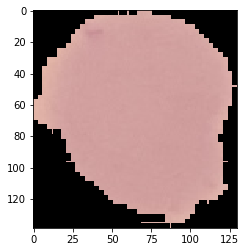

In [74]:
#Uninfected Cell random imgae selected from the training dataset
uninfected_cell= data_dir+'/Uninfected/'+'C85P46ThinF_IMG_20150820_110143_cell_154.png'
uninfected_cell=imread(uninfected_cell)
plt.imshow(uninfected_cell)

In [75]:
len(os.listdir(data_dir+'/Parasitized'))

12479

In [76]:
len(os.listdir(data_dir+'/Uninfected'))

12479

In [77]:
#Two list for knwoing the dimensions of the every image in the training dataset
dim1=[]
dim2=[]
for image in os.listdir(data_dir+'/Parasitized'):
    
    img=imread(data_dir+'/Parasitized/'+image)
    d1,d2,color= img.shape
    dim1.append(d1)
    dim2.append(d2)


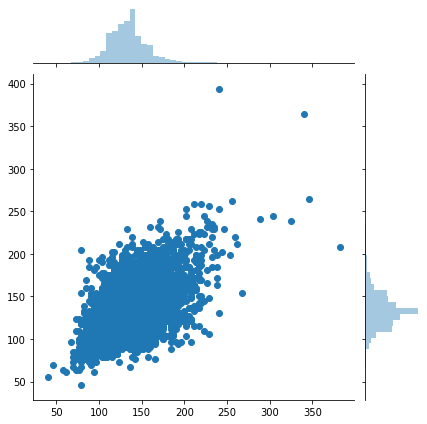

In [78]:
sns.jointplot(dim1,dim2)

In [79]:
#Taking the mean of the dimensions of the images in the training dataset
np.mean(dim1)
np.mean(dim2)

133.66447632021797

In [80]:
#Initializing the image dimensions on the mean basis to be taken as the input_shape for the images feed to the model
image_shape=(134,134,3)


In [81]:
from keras.preprocessing.image import ImageDataGenerator


In [82]:
# Data Agumentation has been applied to make the model more efficient and also to feed images of different orientation to the model
transform_set=ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

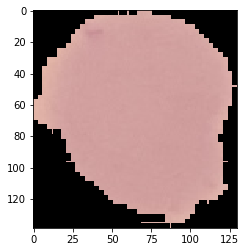

In [83]:
transform_img=uninfected_cell
plt.imshow(transform_img)

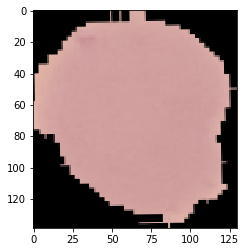

In [84]:
#An example of data agumentation being applied to an sample image
plt.imshow(transform_set.random_transform(transform_img))

In [85]:
transform_set.flow_from_directory(data_dir)

Found 24958 images belonging to 2 classes.


In [86]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.layers import Activation,Flatten, Dropout
from keras.layers.normalization import BatchNormalization


In [87]:
#Model is being initiated
model= Sequential()

#Making Dense Network
model.add(Conv2D(32, (3,3),input_shape=image_shape))
model.add(Activation('relu'))

#Function to make the algo run efficiently by making appropriate changes
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=image_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

#Model Flateening for having input
model.add(Flatten())

model.add(Dense(150))
model.add(Activation('relu'))

#Dropout is being used to reduce overfitting
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 132, 132, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 132, 132, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 132, 132, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

In [88]:
training_set=transform_set.flow_from_directory(data_dir,
                                               target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=True)

Found 24958 images belonging to 2 classes.


In [89]:
training_set.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [90]:
test_dir='/home/varun/Desktop/Malaria_Dataset/cell_images' 

In [91]:
os.listdir(test_dir)

['Uninfected', 'Parasitized']

In [92]:
len(os.listdir(test_dir+'/Parasitized'))

13779

In [93]:
len(os.listdir(test_dir+'/Uninfected'))

13779

In [94]:
test_set=transform_set.flow_from_directory(test_dir,
                                          target_size=image_shape[:2],
                                          color_mode='rgb',
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=False)

Found 27558 images belonging to 2 classes.


In [95]:
test_set.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [96]:
model.fit_generator(training_set, epochs=5,
                          validation_data=test_set)
model.save('Malaria_model.h5')

Epoch 1/5
780/780 [==============================] - 672s 861ms/step - loss: 0.6569 - accuracy: 0.8274 - val_loss: 0.4388 - val_accuracy: 0.9214
Epoch 2/5
780/780 [==============================] - 662s 849ms/step - loss: 0.2544 - accuracy: 0.9257 - val_loss: 0.3211 - val_accuracy: 0.9342
Epoch 3/5
780/780 [==============================] - 703s 901ms/step - loss: 0.2079 - accuracy: 0.9331 - val_loss: 1.1271 - val_accuracy: 0.5176
Epoch 4/5
780/780 [==============================] - 696s 892ms/step - loss: 0.1780 - accuracy: 0.9429 - val_loss: 0.5631 - val_accuracy: 0.9378
Epoch 5/5
780/780 [==============================] - 697s 894ms/step - loss: 0.1713 - accuracy: 0.9476 - val_loss: 0.3893 - val_accuracy: 0.9497


In [97]:
from keras.models import load_model

In [98]:
#model can be loaded without need to train the model again
#model=load_model('Malaria_model.h5')

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 132, 132, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 132, 132, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 132, 132, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

In [100]:
#Another test dataset to evaluate the model
"Not necessary to evaluate the model on another test set"
small_test_set='/home/varun/Desktop/test' 
small_test_set= transform_set.flow_from_directory(test_dir,
                                          target_size=image_shape[:2],
                                          color_mode='rgb',
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=False)

Found 27558 images belonging to 2 classes.


In [58]:
model.evaluate_generator(small_test_set)

[0.5281068086624146, 0.9529356360435486]

In [101]:
score=model.evaluate(test_set)

862/862 [==============================] - 187s 217ms/step


In [102]:
print("Test Accuracy: %.2f%%" %(score[1]*100))

Test Accuracy: 95.18%


In [103]:
metrics=pd.DataFrame(model.history.history)

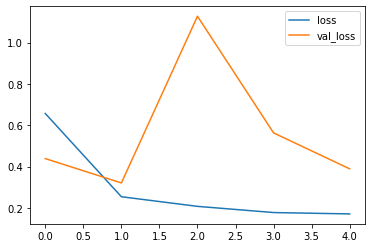

In [104]:
metrics[['loss','val_loss']].plot()

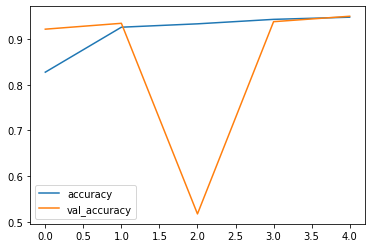

In [105]:
metrics[['accuracy','val_accuracy']].plot()


In [106]:
pred=model.predict_generator(test_set)

In [ ]:
preddicitions=pred >0.8

In [ ]:
preddicitions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_set.classes

In [ ]:
print(classification_report(test_set.classes,preddicitions))

In [269]:
cm=confusion_matrix(test_set.classes, preddicitions)
print(cm)

[[13180   599]
 [  721 13058]]


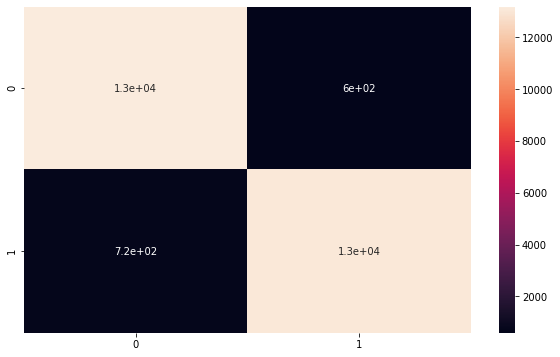

In [268]:
#Graph
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)


In [270]:
from keras.preprocessing import image

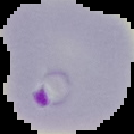

In [274]:
new_image='/home/varun/Desktop/C46P7ThinF_IMG_20151130_205558_cell_159.png'
user_imgae=image.load_img(new_image,target_size=image_shape)
user_imgae

In [275]:
user_image_array=image.img_to_array(user_imgae)

In [276]:
user_image_array.shape

(134, 134, 3)

In [279]:
user_image_array=np.expand_dims(user_image_array,axis=0)

In [280]:
user_image_array.shape

(1, 134, 134, 3)

In [282]:
result=model.predict(user_image_array)

In [285]:
print(int(result))

0
